#### Audio Classification Data Preprocessing

In [3]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
! pip install librosa

  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.51.0 from https://files.pythonhosted.org/packages/e8/1c/5d65ac922a4f9a6f90a10207b818e22e4d48a782af6574a6e7a50fae074d/numba-0.58.0-cp311-cp311-win_amd64.whl.metadata
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.9 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonh

In [22]:
! pip install --upgrade librosa

In [4]:
print(librosa_audio_data)

[-0.00011485 -0.00017083 -0.00017736 ... -0.04609928 -0.04609471
 -0.05099387]


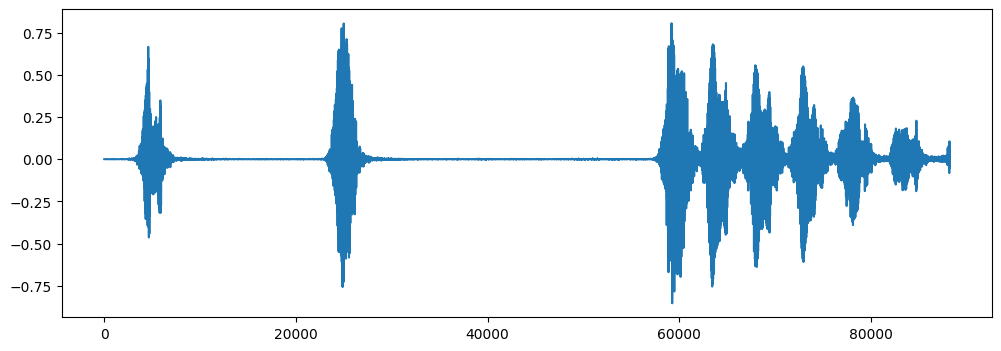

In [5]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [6]:
### Lets read with scipy
#scipy will present the data as it is

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [6]:
wave_audio


array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

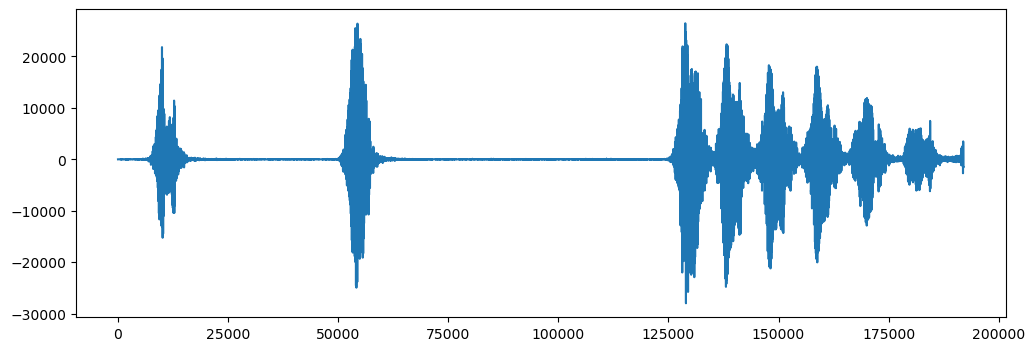

In [7]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.



The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope


MFCC has the characteristics of high accuracy and stable recognition. At the same time, advantages of MFCC including high-fidelity representation and stable recognition

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [9]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999226e+00,  1.6759441e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355560e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179771e+01,  3.2849548e+01],
       ...,
       [ 4.3309405e-01, -3.5408895e+00, -4.8356495e+00, ...,
        -5.2699118e+00, -1.2849241e-01,  7.5349283e-01],
       [ 4.4520712e-01, -3.2774832e+00, -4.6472917e+00, ...,
        -3.4224057e+00,  3.9007006e+00,  5.5314511e-01],
       [ 3.5697091e-01, -2.9899054e+00, -4.4125957e+00, ...,
        -2.6713324e+00,  2.7894549e+00,  1.4205611e-01]], dtype=float32)

In [10]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.sample(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
978,121286-0-0-10.wav,121286,5.000000,9.000000,1,5,0,air_conditioner
4906,193699-2-0-46.wav,193699,23.000000,27.000000,2,8,2,children_playing
2120,151359-1-0-0.wav,151359,5.038068,5.180168,1,3,1,car_horn
8335,88121-8-0-3.wav,88121,1.500000,5.500000,2,10,8,siren
4807,190680-3-6-0.wav,190680,36.248340,40.248340,2,6,3,dog_bark
3405,169466-4-2-17.wav,169466,165.640268,169.640268,2,4,4,drilling
372,105029-7-0-5.wav,105029,13.926527,17.926527,1,9,7,jackhammer
8633,98223-7-7-0.wav,98223,45.939253,48.165112,1,1,7,jackhammer
6301,39854-5-1-3.wav,39854,145.573254,149.573254,1,6,5,engine_idling
6640,50661-5-0-5.wav,50661,2.500000,6.500000,1,4,5,engine_idling


In [11]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling', 'Bell', 'Saurav', 'Sumit', 'Chirag ', 'Chirag'],
      dtype=object)

In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='soxr_hq') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [13]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

3555it [02:43, 22.42it/s]c:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [06:24, 28.40it/s]c:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [06:24, 27.74it/s]c:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8767it [06:44, 21.65it/s]


In [33]:
final_class_labels

'Chirag'

In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658783, 50.690277,...",children_playing


In [15]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [16]:
X.shape

(8767, 40)

In [18]:
y


array(['dog_bark', 'children_playing', 'children_playing', ..., 'Chirag',
       'Chirag', 'Chirag'], dtype='<U16')

In [19]:
! pip install tensorflow

In [21]:
import tensorflow  as tf
print(tf.__version__)

2.12.0


In [20]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-9.3053345e+01,  1.6973488e+01, -1.2441312e+01, ...,
        -4.9348080e-01, -2.8408728e+00,  1.2920443e+00],
       [-1.5447452e+02,  9.6937759e+01, -5.8436546e+01, ...,
         6.6603839e-01,  2.8853959e-01, -1.3032772e-02],
       [-7.1077324e+01,  2.6173710e+01, -2.8050709e+00, ...,
         3.1510882e+00,  2.2291317e+00, -1.3275179e+00],
       ...,
       [-4.2665570e+02,  9.1551338e+01,  4.1917033e+00, ...,
         9.7439998e-01,  5.1544541e-01,  9.1537476e-01],
       [-1.3725197e+02,  1.2426854e+02, -2.1599773e+01, ...,
         1.2500863e+00, -1.8957511e+00, -9.0149736e-01],
       [-4.1838937e+02,  2.0686234e+02,  7.2346177e+00, ...,
        -3.9861214e+00, -4.7178450e+00, -2.7892590e-01]], dtype=float32)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X_train.shape

(7013, 40)

In [27]:
X_test.shape

(1754, 40)

In [28]:
y_train.shape

(7013, 15)

In [29]:
y_test.shape

(1754, 15)

### Model Creation

In [46]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
### No of classes
num_labels=y.shape[1]

In [32]:
num_labels

15

Grid search cv for best parameters

Best Hyperparameters: {'num_hidden_layers': 1, 'units_per_layer': 256, 'learning_rate': 0.001, 'dropout_rate': 0.3}, Best Accuracy: 0.9184720516204834

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from datetime import datetime

# Define a function to create and compile the model
def create_model(num_hidden_layers, units_per_layer, learning_rate, dropout_rate):
    model = Sequential()
    
    # Add input layer
    model.add(Dense(units_per_layer, input_shape=(40,)))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))
    
    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(Dense(units_per_layer))
        model.add(Activation('relu'))
        model.add(Dropout(dropout_rate))
    
    # Add output layer
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    
    # Compile the model with custom learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    return model

# Define hyperparameters to search over
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'units_per_layer': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Assuming X_train, y_train, X_test, y_test are defined

best_accuracy = 0
best_hyperparameters = None

for num_hidden_layers in param_grid['num_hidden_layers']:
    for units_per_layer in param_grid['units_per_layer']:
        for learning_rate in param_grid['learning_rate']:
            for dropout_rate in param_grid['dropout_rate']:
                print(f"Testing hyperparameters: num_hidden_layers={num_hidden_layers}, units_per_layer={units_per_layer}, learning_rate={learning_rate}, dropout_rate={dropout_rate}")
                
                model = create_model(num_hidden_layers, units_per_layer, learning_rate, dropout_rate)
                
                # Assuming you have X_train, y_train, X_test, y_test defined
                start = datetime.now()
                model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
                duration = datetime.now() - start
                
                test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
                
                print(f"Test Accuracy: {test_accuracy}, Time: {duration}")
                
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_hyperparameters = {
                        'num_hidden_layers': num_hidden_layers,
                        'units_per_layer': units_per_layer,
                        'learning_rate': learning_rate,
                        'dropout_rate': dropout_rate
                    }

print(f"Best Hyperparameters: {best_hyperparameters}, Best Accuracy: {best_accuracy}")


Testing hyperparameters: num_hidden_layers=1, units_per_layer=64, learning_rate=0.001, dropout_rate=0.3


KeyboardInterrupt: 

model building 

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the best hyperparameters
num_hidden_layers = 1
units_per_layer = 256
learning_rate = 0.001
dropout_rate = 0.3


model = Sequential()

# Add first layer
model.add(Dense(units_per_layer, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

# Add hidden layer (since num_hidden_layers = 1)
model.add(Dense(units_per_layer))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

# Add final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

# Training configuration
num_epochs = 100
num_batch_size = 32

# ModelCheckpoint for saving the best model
checkpointer = ModelCheckpoint(filepath='model/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)

# Train the model
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start


print("Training completed in time: ", duration)


Epoch 1/100
209/220 [===========================>..] - ETA: 0s - loss: 5.0999 - accuracy: 0.2597
Epoch 1: val_loss improved from inf to 2.02911, saving model to model\audio_classification.hdf5
220/220 [==============================] - 2s 6ms/step - loss: 4.9621 - accuracy: 0.2615 - val_loss: 2.0291 - val_accuracy: 0.3632
Epoch 2/100
211/220 [===========================>..] - ETA: 0s - loss: 1.8980 - accuracy: 0.3655
Epoch 2: val_loss improved from 2.02911 to 1.60438, saving model to model\audio_classification.hdf5
220/220 [==============================] - 1s 5ms/step - loss: 1.8946 - accuracy: 0.3675 - val_loss: 1.6044 - val_accuracy: 0.4675
Epoch 3/100
218/220 [============================>.] - ETA: 0s - loss: 1.6304 - accuracy: 0.4464
Epoch 3: val_loss improved from 1.60438 to 1.32329, saving model to model\audio_classification.hdf5
220/220 [==============================] - 1s 4ms/step - loss: 1.6297 - accuracy: 0.4465 - val_loss: 1.3233 - val_accuracy: 0.5696
Epoch 4/100
215/220 

In [34]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.920182466506958


In [35]:
X_test[1]

array([-89.60986   , 138.54202   , -34.66755   ,  -6.325211  ,
       -14.328585  ,  -6.6653895 ,  -9.3626585 ,  -4.4089456 ,
       -13.62875   ,  -7.837764  ,  -9.734955  ,  -1.6937976 ,
        -4.1387577 ,  -3.6724246 , -10.9405155 ,  -7.6744604 ,
       -11.292069  ,  -2.1165285 ,  -6.9831605 ,  -0.4331562 ,
       -11.776561  ,  -7.823608  ,  -8.694304  ,   3.819956  ,
         5.5766864 ,  16.414688  ,   6.421837  ,   3.68199   ,
        -4.729585  ,   2.8164399 ,   4.4024453 ,   7.9418097 ,
         1.9626477 ,  -3.597658  ,  -6.426121  ,  -0.43179762,
         3.4978323 ,   3.5428402 ,  -0.7285823 ,  -3.1850307 ],
      dtype=float32)

In [36]:
model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


array([[2.06760160e-16, 8.33982817e-16, 4.80251956e-22, ...,
        2.83715966e-08, 1.88682447e-04, 7.66304729e-05],
       [0.00000000e+00, 2.81614827e-37, 0.00000000e+00, ...,
        1.07230275e-16, 4.08208767e-15, 4.88036206e-13],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.68868060e-25, 2.47036107e-25, 5.00014686e-21],
       ...,
       [2.23483926e-06, 1.95211025e-09, 2.70063474e-08, ...,
        3.28191643e-04, 1.39185588e-03, 2.77429402e-01],
       [1.04251785e-09, 9.09773149e-19, 1.20228647e-19, ...,
        4.56988847e-09, 4.10145091e-08, 4.24041355e-05],
       [1.86394679e-37, 0.00000000e+00, 0.00000000e+00, ...,
        5.46022849e-15, 6.62230796e-26, 8.20156605e-21]], dtype=float32)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [37]:
import librosa
import numpy as np

# Assuming you have already loaded and compiled your model
# model = load_model('path_to_your_model.h5')

filename = "UrbanSound8K/99830-1-1-0.wav"
audio, sample_rate = librosa.load(filename, res_type='soxr_hq')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Assuming `model` is already loaded and compiled

# model.prediction_classes is removed use .predict 
predicted_label = model.predict(mfccs_scaled_features)
# Assuming `labelencoder` is already defined
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))
print(prediction_class)


[-4.2007812e+02  6.5584145e+01  3.3430901e+00 -4.7124267e+00
 -4.4960961e+00 -4.9654031e+00 -1.9396935e+00 -6.0600209e+00
 -9.9962511e+00  3.0589890e+00  1.1677864e+00  5.2523513e+00
  1.1553643e+00  1.3698374e+00 -6.2704787e+00 -1.1981721e+01
 -1.2185408e+01 -1.0762297e+01 -6.6250238e+00 -2.1179211e+00
  1.0248964e-01 -1.5895659e+00 -1.2512857e+00 -2.5746005e+00
 -4.7969551e+00  1.1725523e+00  3.8943892e+00 -4.0028912e-01
 -4.3901405e+00 -7.2879868e+00 -5.1036544e+00  1.0500879e+00
  1.6143800e+00  1.1850310e-01 -6.0043998e+00 -3.9069829e+00
 -9.5882940e-01 -5.6813955e-01 -2.5715387e+00 -5.5395365e+00]
[[-4.2007812e+02  6.5584145e+01  3.3430901e+00 -4.7124267e+00
  -4.4960961e+00 -4.9654031e+00 -1.9396935e+00 -6.0600209e+00
  -9.9962511e+00  3.0589890e+00  1.1677864e+00  5.2523513e+00
   1.1553643e+00  1.3698374e+00 -6.2704787e+00 -1.1981721e+01
  -1.2185408e+01 -1.0762297e+01 -6.6250238e+00 -2.1179211e+00
   1.0248964e-01 -1.5895659e+00 -1.2512857e+00 -2.5746005e+00
  -4.7969551e+00 

In [61]:
import librosa
import numpy as np
from gtts import gTTS
import os

# Load and process audio
filename = "UrbanSound8K/99830-1-1-0.wav"
audio, sample_rate = librosa.load(filename, res_type='soxr_hq')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Print and reshape features
print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Assuming `model` is already loaded and compiled

# Make a prediction
predicted_label = model.predict(mfccs_scaled_features)

# Assuming `labelencoder` is already defined
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))[0]

# Convert prediction to speech
tts = gTTS(text=f"The predicted class is {prediction_class}", lang='en')
tts.save("prediction.mp3")

# Play the audio
os.system("start prediction.mp3")


[-4.2007812e+02  6.5584145e+01  3.3430896e+00 -4.7124267e+00
 -4.4960961e+00 -4.9654031e+00 -1.9396937e+00 -6.0600214e+00
 -9.9962511e+00  3.0589893e+00  1.1677864e+00  5.2523513e+00
  1.1553640e+00  1.3698374e+00 -6.2704792e+00 -1.1981722e+01
 -1.2185408e+01 -1.0762297e+01 -6.6250238e+00 -2.1179214e+00
  1.0248957e-01 -1.5895658e+00 -1.2512856e+00 -2.5746005e+00
 -4.7969551e+00  1.1725523e+00  3.8943892e+00 -4.0028915e-01
 -4.3901401e+00 -7.2879868e+00 -5.1036544e+00  1.0500878e+00
  1.6143799e+00  1.1850313e-01 -6.0043998e+00 -3.9069829e+00
 -9.5882940e-01 -5.6813949e-01 -2.5715384e+00 -5.5395365e+00]
[[-4.2007812e+02  6.5584145e+01  3.3430896e+00 -4.7124267e+00
  -4.4960961e+00 -4.9654031e+00 -1.9396937e+00 -6.0600214e+00
  -9.9962511e+00  3.0589893e+00  1.1677864e+00  5.2523513e+00
   1.1553640e+00  1.3698374e+00 -6.2704792e+00 -1.1981722e+01
  -1.2185408e+01 -1.0762297e+01 -6.6250238e+00 -2.1179214e+00
   1.0248957e-01 -1.5895658e+00 -1.2512856e+00 -2.5746005e+00
  -4.7969551e+00 

0

In [107]:
import numpy as np
import sounddevice as sd
from gtts import gTTS
import os
from tensorflow.keras.models import load_model
import librosa

# Load your pre-trained model
model = load_model('model/audio_classification.hdf5')  # Replace with the actual path

# Function to record audio
def record_audio(duration):
    audio = sd.rec(int(sr * duration), samplerate=sr, channels=2, dtype='float32')
    sd.wait()
    return audio.flatten()

# Define the sample rate (sr) for audio processing
sr = 44100  # You may need to adjust this based on your specific use case

# Record audio button
duration = 5  # Adjust the recording duration as needed
audio_data = record_audio(duration)
print("Audio recorded.")

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Make a prediction using your model
predicted_label = model.predict(mfccs_scaled_features)

# Assuming `labelencoder` is already defined
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))[0]

# Convert prediction to speech
tts = gTTS(text=f"The predicted class is {prediction_class}", lang='en')
tts.save("prediction.mp3")

# Play the audio
os.system("start prediction.mp3")


Audio recorded.
1/1 [==============================] - 0s 81ms/step


0

In [55]:
import numpy as np
import sounddevice as sd
from gtts import gTTS
import os
import librosa
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load your pre-trained model
model = load_model('saved_models/audio_classification.hdf5')  # Replace with the actual path

# Define the sample rate (sr) for audio processing
sr = 44100  # You may need to adjust this based on your specific use case

# Function to record audio
def record_audio(duration):
    audio = sd.rec(int(sr * duration), samplerate=sr, channels=1, dtype='float32')
    sd.wait()
    return audio.flatten()

# Assuming you have a list of target labels, let's call it `target_labels`
target_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']  # Replace with your actual labels
labelencoder = LabelEncoder()
labelencoder.fit(target_labels)

# Record audio button
duration = 20 # Adjust the recording duration as needed
audio_data = record_audio(duration)
print("Audio recorded.")

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Make a prediction using your model
predicted_label = model.predict(mfccs_scaled_features)
print(mfccs_scaled_features)

# Assuming `labelencoder` is already defined
prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))[0]

# Convert prediction to speech
tts = gTTS(text=f"The predicted class is {prediction_class}", lang='en')
tts.save("prediction.mp3")

# Play the audio
os.system("start prediction.mp3")


Audio recorded.
1/1 [==============================] - 0s 69ms/step
[[-5.3054742e+02  1.0883851e+02  2.0316114e+01  1.1384789e+01
   2.1208843e+01  9.4560251e+00  4.2388911e+00  1.4561793e+01
   1.4046582e+01  3.7534454e+00  5.1530361e+00  5.8276258e+00
   3.8287941e-01  2.0557330e+00  3.8230059e+00  2.5114007e+00
   2.9654262e+00  3.9525197e+00  4.7207208e+00  4.0034461e+00
   5.2109456e+00  8.0276194e+00  6.1006231e+00  3.5714705e+00
   3.9831026e+00  4.3027143e+00  2.5264680e+00  1.7124295e+00
   3.9766345e+00  4.2750549e+00  2.3401988e+00  3.2891521e+00
   3.5308549e+00  2.3815131e+00  2.3106608e+00  1.2843330e+00
   1.4020311e+00  3.5973113e+00  4.2259178e+00  3.4249554e+00]]


0

In [30]:
import pickle
from tensorflow.keras.models import load_model

# Assuming you have a Keras model saved as 'audio_classification.hdf5'
# Load the model
model = load_model('model/audio_classification.hdf5')

# Save the architecture
with open('model_architecture.pkl', 'wb') as arch_file:
    pickle.dump(model.to_json(), arch_file)

# Save the weights
model.save_weights('model_weights.h5')



In [31]:
import streamlit as st
from tensorflow.keras.models import model_from_json

# Load the architecture
with open('model_architecture.pkl', 'rb') as arch_file:
    model_architecture = pickle.load(arch_file)

# Load the weights
model = model_from_json(model_architecture)
model.load_weights('model_weights.h5')

# Now you can use 'model' for predictions


In [38]:
! pip install sounddevice

  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)


In [39]:
! pip install streamlit


In [52]:
! pip install librosa

In [40]:
! pip install pyngrok

  Using cached pyngrok-7.0.0-py3-none-any.whl


In [41]:
! ngrok authtoken  2VtleInyVoLg5PIz7vFb8pOLxIq_2g3hxHSmjLNx7rATJMHei

                                                                                                    
Installing ngrok ... 
                                                                                                    
Authtoken saved to configuration file: C:\Users\Sumit\.ngrok2\ngrok.yml


In [43]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


# second method for deployment of the app 

In [44]:
! unzip ngrok-stable-linux-amd64.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
get_ipython().system_raw('./ngrok http 8501 &')

In [46]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [ ]:
%%writefile main.py

import streamlit as st
import tensorflow as tf
import streamlit as st
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from gtts import gTTS
import os

# Function to load the model
@st.cache_resource()
def load_model():
    model = tf.keras.models.load_model('saved_models/audio_classification.hdf5')
    return model

# Set page title and favicon
st.set_page_config(
    page_title="Audio Classification Web App",
    page_icon="🔊"
)

# Loading the model
with st.spinner('Model is being loaded..'):
    model = load_model()

# Set app title and description
st.title("Audio Classification Web App")
st.write("Upload an audio file and the app will predict its class.")

# Upload file and classify
uploaded_file = st.sidebar.file_uploader("Choose an audio file...", type=["wav", "mp3"])

# Initialize label encoder
labelencoder = LabelEncoder()

# Assuming you have a list of target labels, let's call it `target_labels`
target_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']  # Replace with your actual labels
labelencoder.fit(target_labels)

# Define function to import and predict
def import_and_predict(uploaded_file, model, labelencoder):
    audio, sample_rate = librosa.load(uploaded_file , res_type='soxr_hq')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
    predicted_label = model.predict(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))
    return prediction_class[0]

if uploaded_file is not None:
    # Predict the class and convert prediction to speech
    predicted_class = import_and_predict(uploaded_file, model, labelencoder)
    tts = gTTS(text=f"The predicted class is {predicted_class}", lang='en')
    tts.save("prediction.mp3")

    # Play the audio
    os.system("start prediction.mp3")
    
    # Display the predicted class with enhanced styling
    st.markdown(f"<h1 style='text-align: center; color: blue;'>Predicted Class: {predicted_class}</h1>", unsafe_allow_html=True)


In [47]:
%%writefile main.py

import streamlit as st
import tensorflow as tf
import streamlit as st
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from gtts import gTTS
import os
from twilio.rest import Client

# Load your pre-trained model
model = tf.keras.models.load_model('saved_models/audio_classification.hdf5')

# Function to load the model
@st.cache_resource()
def load_model():
    model = tf.keras.models.load_model('saved_models/audio_classification.hdf5')
    return model

# Set page title and favicon
st.set_page_config(
    page_title="Audio Classification Web App",
    page_icon="🔊"
)

# Loading the model
with st.spinner('Model is being loaded..'):
    model = load_model()

# Set app title and description
st.title("Audio Classification Web App")
st.write("Upload an audio file and the app will predict its class.")

# Upload file and classify
uploaded_file = st.sidebar.file_uploader("Choose an audio file...", type=["wav", "mp3"])

# Initialize label encoder
labelencoder = LabelEncoder()

# Assuming you have a list of target labels, let's call it `target_labels`
target_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']  # Replace with your actual labels
labelencoder.fit(target_labels)

# Define function to import and predict
def import_and_predict(uploaded_file, model, labelencoder):
    audio, sample_rate = librosa.load(uploaded_file , res_type='soxr_hq')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
    predicted_label = model.predict(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))
    return prediction_class[0]

# Function to send SMS
def send_sms(class_name):
    account_sid = 'ACff147d01dc4a8cbf2bc6f72da95298a0'
    auth_token = 'd3c9fa9ad4cf44783498d34b65e8f5b1'
    client = Client(account_sid, auth_token)

    message = client.messages.create(
      from_='+12565675992',
      body=f'The predicted class is {class_name}',
      to='+919665182219'
    )

    return message.sid

if uploaded_file is not None:
    # Predict the class and convert prediction to speech
    predicted_class = import_and_predict(uploaded_file, model, labelencoder)
    tts = gTTS(text=f"The predicted class is {predicted_class}", lang='en')
    tts.save("prediction.mp3")

    # Play the audio
    os.system("start prediction.mp3")
    
    # Display the predicted class with enhanced styling
    st.markdown(f"<h1 style='text-align: center; color: blue;'>Predicted Class: {predicted_class}</h1>", unsafe_allow_html=True)
    
    # Send SMS
    message_sid = send_sms(predicted_class)
    st.write(f"SMS Sent. Message SID: {message_sid}")


Overwriting main.py


used your own account_sid and token (create account on twilio)
used for sending the msg

In [116]:
from twilio.rest import Client

account_sid = 'ACff147d01dc4a8cbf2bc6f72da95298a0'
auth_token = 'd3c9fa9ad4cf44783498d34b65e8f5b1'
client = Client(account_sid, auth_token)

message = client.messages.create(
  from_='+12565675992',
  body='heelo this side sumit',
  to='+919665182219'
)

print(message.sid)

SMb7eeb49ce01afb7b44748e58d06da20d


In [48]:
! pip install twilio

In [118]:
! pip install streamlit

In [119]:
! pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [120]:
! pip install --upgrade

ERROR: You must give at least one requirement to install (see "pip help install")


In [121]:
! pip install numpy

In [54]:
%%writefile main.py 

import streamlit as st
import tensorflow as tf
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from gtts import gTTS
import os
from twilio.rest import Client
import sounddevice as sd
from IPython.display import Audio


# Function to load the model
@st.cache_resource()
def load_model():
    model = tf.keras.models.load_model('model/audio_classification.hdf5')
    return model

# Set page title and favicon
st.set_page_config(
    page_title="Audio Classification Web App",
    page_icon="🔊"
)

# Loading the model
with st.spinner('Model is being loaded..'):
    model = load_model()

# Set app title and description
st.title("Audio Classification Web App")
st.write("Upload an audio file or record audio and the app will predict its class.")

# Sidebar option to choose between file upload and audio recording
option = st.sidebar.selectbox("Choose Input Method", ["Upload File", "Record Audio"])

# Initialize label encoder
labelencoder = LabelEncoder()

# Assuming you have a list of target labels, let's call it `target_labels`
target_labels = ['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling', 'Bell', 'Saurav', 'Sumit', 'Chirag ', 'Chirag']
labelencoder.fit(target_labels)

# Define function to import and predict
def import_and_predict(uploaded_file, model, labelencoder):
    audio, sample_rate = librosa.load(uploaded_file , res_type='soxr_hq')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
    predicted_label = model.predict(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))
    return prediction_class[0]

# Function to send SMS
def send_sms(class_name):
    account_sid = 'ACff147d01dc4a8cbf2bc6f72da95298a0'
    auth_token = 'd3c9fa9ad4cf44783498d34b65e8f5b1'
    client = Client(account_sid, auth_token)

    message = client.messages.create(
      from_='+12565675992',
      body=f'The predicted class is {class_name}',
      to='+919665182219'
    )

    print(message.sid)



# ... (rest of your code)

from io import BytesIO

# ... (rest of your code)

if option == "Upload File":
    # Upload file and classify
    uploaded_file = st.sidebar.file_uploader("Choose an audio file...", type=["wav", "mp3"])

    if uploaded_file is not None:
        # Predict the class and convert prediction to speech
        predicted_class = import_and_predict(uploaded_file, model, labelencoder)
        tts = gTTS(text=f"{predicted_class}", lang='en')
        tts.save("prediction.mp3")

        # Display the predicted class with enhanced styling
        st.markdown(f"<h1 style='text-align: center; color: blue;'>Predicted Class: {predicted_class}</h1>", unsafe_allow_html=True)

        # Send SMS
        message_sid = send_sms(predicted_class)

        # Play the audio using HTML5 audio tag
        audio_file = open("prediction.mp3", "rb").read()
        b64_audio = base64.b64encode(audio_file).decode()
        st.audio(audio_file, format='audio/mp3', start_time=0, autoplay=True)

        st.write(f"SMS Sent. Message SID: {message_sid}")

# ... (rest of your code)


elif option == "Record Audio":
    # Define the sample rate (sr) for audio processing
    sr = 44100  # You may need to adjust this based on your specific use case
    
    # Function to record audio
    def record_audio(duration):
        try:
            audio = sd.rec(int(sr * duration), samplerate=sr, channels=1, dtype='float32')
            sd.wait()
            return audio.flatten()
        except Exception as e:
            print(f"Error occurred while recording audio: {e}")
            return None

    # Record audio button
    duration = 10  # Adjust the recording duration as needed
    audio_data = record_audio(duration)
    print("Audio recorded.")

    # Extract MFCC features
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

    # Make a prediction using your model
    predicted_label = model.predict(mfccs_scaled_features)

    # Assuming `labelencoder` is already defined
    prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))[0]

    # Convert prediction to speech
    tts = gTTS(text=f"{prediction_class}", lang='en')
    tts.save("prediction.mp3")

    # Play the audio using HTML audio element
    audio_file = open("prediction.mp3", "rb").read()
    st.audio(audio_file, format="audio/mp3")

    # Send SMS
    message_sid = send_sms(prediction_class)
    print(f"SMS Sent. Message SID: {message_sid}")


Overwriting main.py


In [51]:
pip install gTTS



  Using cached gTTS-2.3.2-py3-none-any.whl (28 kB)


final web app code! using streamlit 

In [1]:
%%writefile test.py

import streamlit as st
import tensorflow as tf
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from gtts import gTTS
import os
from twilio.rest import Client
import sounddevice as sd

# Function to load the model
@st.cache_resource()
def load_model():
    model = tf.keras.models.load_model('model/audio_classification.hdf5')
    return model

# Set page title and favicon
st.set_page_config(
    page_title="Audio Classification Web App",
    page_icon="🔊"
)

# Loading the model
with st.spinner('Model is being loaded..'):
    model = load_model()

# Set app title and description
st.title("Audio Classification Web App")
st.write("Upload an audio file or record audio and the app will predict its class.")

# Sidebar option to choose between file upload and audio recording
option = st.sidebar.selectbox("Choose Input Method", ["Upload File", "Record Audio"])

# Initialize label encoder
labelencoder = LabelEncoder()

# Assuming you have a list of target labels, let's call it `target_labels`
target_labels = ['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling', 'Bell', 'Saurav', 'Sumit', 'Chirag ', 'Chirag']
labelencoder.fit(target_labels)

# Define function to import and predict
def import_and_predict(uploaded_file, model, labelencoder):
    audio, sample_rate = librosa.load(uploaded_file , res_type='soxr_hq')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
    predicted_label = model.predict(mfccs_scaled_features)
    prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))
    return prediction_class[0]

# Function to send SMS
def send_sms(class_name):
    account_sid = 'AC3c9f03c6cd28df08212e81683d3b8b26'
    auth_token = '35307fce148840ea36a85ff9f3d5fa21'
    client = Client(account_sid, auth_token)

    message = client.messages.create(
      from_='+12512209585 ',
      body=f'The predicted class is {class_name}',
      to='+919594541002'
    )

    print(message.sid)

 


if option == "Upload File":
    # Upload file and classify
    uploaded_file = st.sidebar.file_uploader("Choose an audio file...", type=["wav", "mp3"])

    if uploaded_file is not None:
        # Predict the class and convert prediction to speech
        predicted_class = import_and_predict(uploaded_file, model, labelencoder)
        tts = gTTS(text=f"  {predicted_class}", lang='en')
        tts.save("prediction.mp3")

        # Play the audio
        os.system("start prediction.mp3")

        # Display the predicted class with enhanced styling
        st.markdown(f"<h1 style='text-align: center; color: blue;'>Predicted Class: {predicted_class}</h1>", unsafe_allow_html=True)

        # Send SMS
        message_sid = send_sms(predicted_class)
        st.write(f"SMS Sent. Message SID: {message_sid}")

elif option == "Record Audio":
    # Define the sample rate (sr) for audio processing
    sr = 44100  # You may need to adjust this based on your specific use case

    
# Function to record audio
    def record_audio(duration):
        try:
            audio = sd.rec(int(sr * duration), samplerate=sr, channels=1, dtype='float32')
            sd.wait()
            return audio.flatten()
        except Exception as e:
            print(f"Error occurred while recording audio: {e}")
            return None



    # Record audio button
    duration = 10  # Adjust the recording duration as needed
    audio_data = record_audio(duration)
    print("Audio recorded.")

    # Extract MFCC features
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

    # Make a prediction using your model
    predicted_label = model.predict(mfccs_scaled_features)

    # Assuming `labelencoder` is already defined
    prediction_class = labelencoder.inverse_transform(np.argmax(predicted_label, axis=1))[0]

    # Convert prediction to speech
    tts = gTTS(text=f" {prediction_class}", lang='en')
    tts.save("prediction.mp3")

    # Play the audio
    os.system("start prediction.mp3")

    # Send SMS
    message_sid = send_sms(prediction_class)
    print(f"SMS Sent. Message SID: {message_sid}")


Overwriting test.py


In [2]:
! streamlit run test.py

^C


Thank you ! 